<a href="https://colab.research.google.com/github/cruz-marco/breast_cancer_mlp_classifier/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importe de bibliotecas

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import kstest, zscore
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, recall_score

In [280]:
import warnings
warnings.filterwarnings('ignore')

# 2.0 Análise exploratória dos dados

In [281]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/breast_cancer/b_cancer.csv').drop(columns=['Unnamed: 32', 'id'])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Duas colunas inúteis: 'id' e 'Unnamed: 32', eliminadas já no carregamento dos dados

## 2.1 Estudando a distribuição das variáveis numéricas.

In [282]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
radius_mean,569.0,14.127292,3.524049,6.981000,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

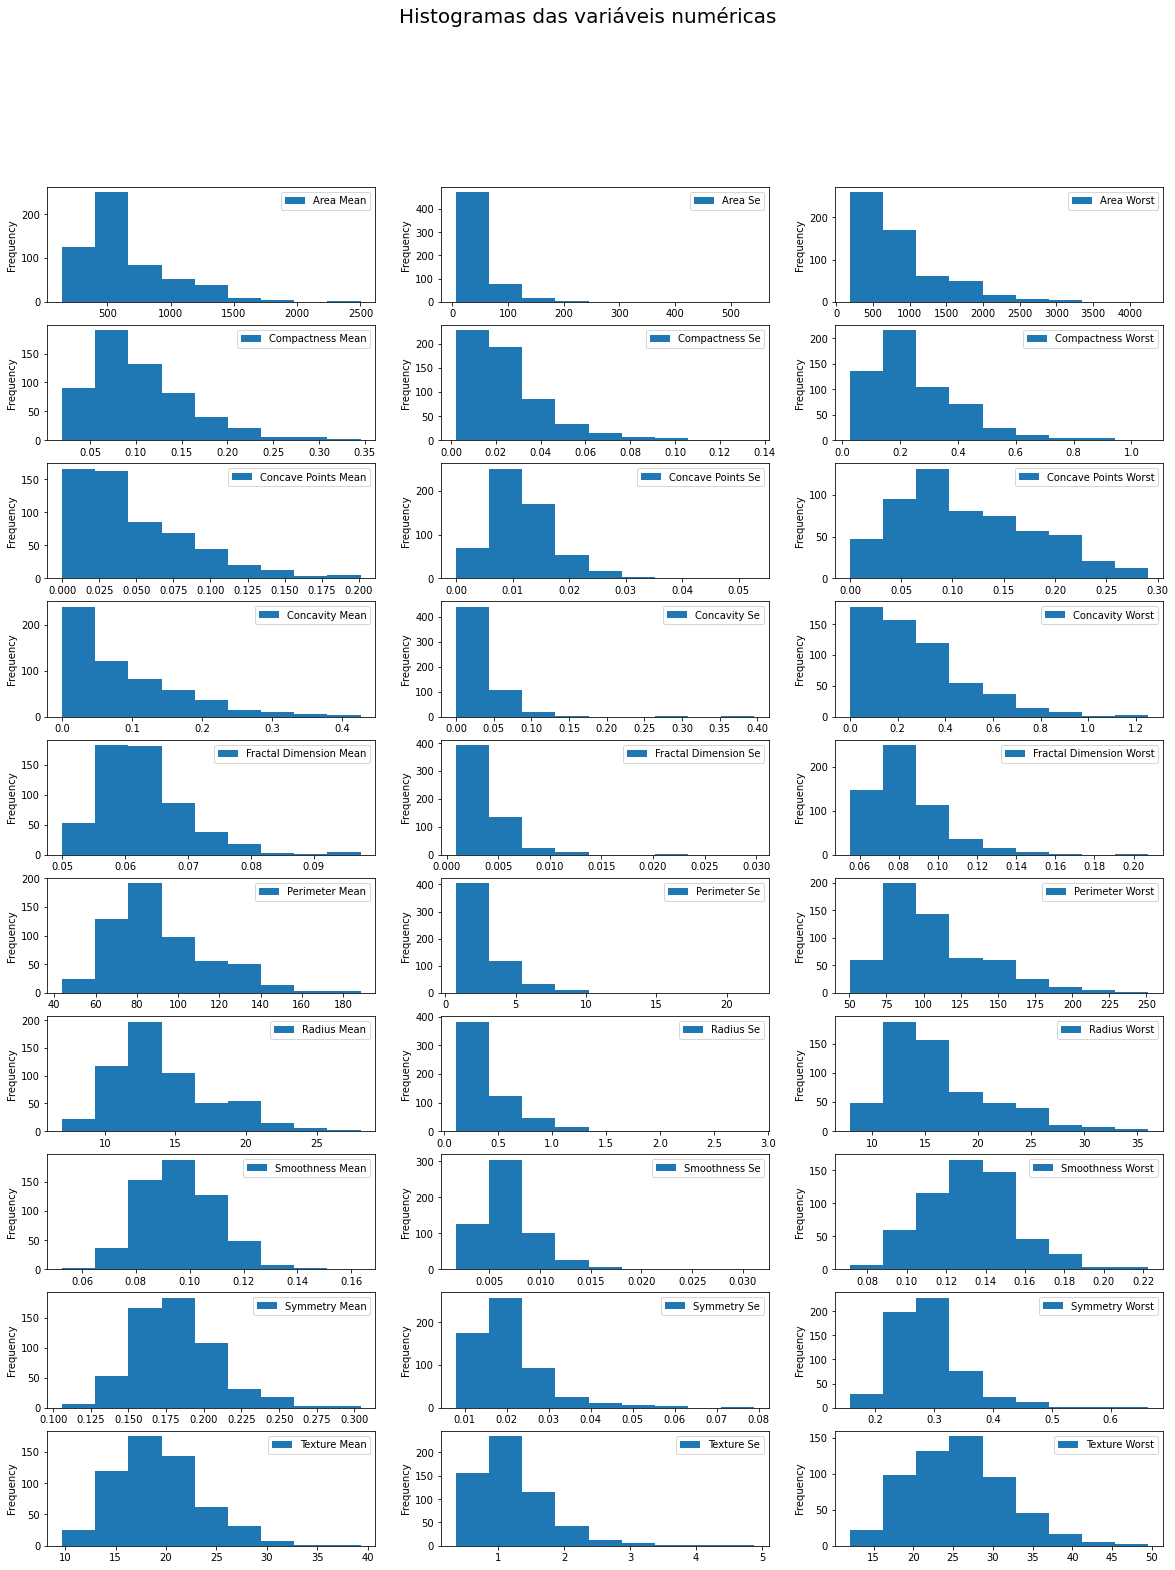

In [284]:
numeric_vars = sorted(tuple(df.select_dtypes(include='number').columns))[::-1]

nv_index = len(numeric_vars) - 1 

ncols = 3
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))



fig, axes = plt.subplots(nrows, ncols, figsize=(20, 25))

fig.suptitle('Histogramas das variáveis numéricas', fontsize=20)


for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado

            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            df[numeric_vars[nv_index]].plot.hist(bins=9, 
            label=numeric_vars[nv_index].replace('_', ' ').title(), 
            subplots=True, legend=True, ax=axes[linha, coluna])
      
            nv_index -= 1

        else:
            plt.axis('off')


plt.show()

## 2.2 Teste de normalidade Kolmogorov-Smirnov

In [285]:
nrm_test = list()

for var in numeric_vars:
    ks, pvalue = kstest(df[var], cdf = 'norm')
    nrm_test.append({
        'Variavel': var,
        'Estatistica KS': ks,
        'p-valor': pvalue
    })
    
print(*sorted(nrm_test, key=lambda x: x['Estatistica KS']), sep='\n')

{'Variavel': 'concavity_worst', 'Estatistica KS': 0.5, 'p-valor': 4.604431081733901e-132}
{'Variavel': 'concavity_se', 'Estatistica KS': 0.5, 'p-valor': 4.604431081733901e-132}
{'Variavel': 'concavity_mean', 'Estatistica KS': 0.5, 'p-valor': 4.604431081733901e-132}
{'Variavel': 'concave points_worst', 'Estatistica KS': 0.5, 'p-valor': 4.604431081733901e-132}
{'Variavel': 'concave points_se', 'Estatistica KS': 0.5, 'p-valor': 4.604431081733901e-132}
{'Variavel': 'concave points_mean', 'Estatistica KS': 0.5, 'p-valor': 4.604431081733901e-132}
{'Variavel': 'fractal_dimension_se', 'Estatistica KS': 0.5003569735048671, 'p-valor': 2.896478907003304e-132}
{'Variavel': 'smoothness_se', 'Estatistica KS': 0.500683387792109, 'p-valor': 1.8951021506975294e-132}
{'Variavel': 'compactness_se', 'Estatistica KS': 0.5008984172560762, 'p-valor': 1.4327732153629866e-132}
{'Variavel': 'symmetry_se', 'Estatistica KS': 0.5031444304956487, 'p-valor': 7.646411735160716e-134}
{'Variavel': 'compactness_mean', '

- Nenhuma variávei é de fato normal, entretanto muitas se assemelham bastante à distribuição.

## 2.3 Verificação de outliers

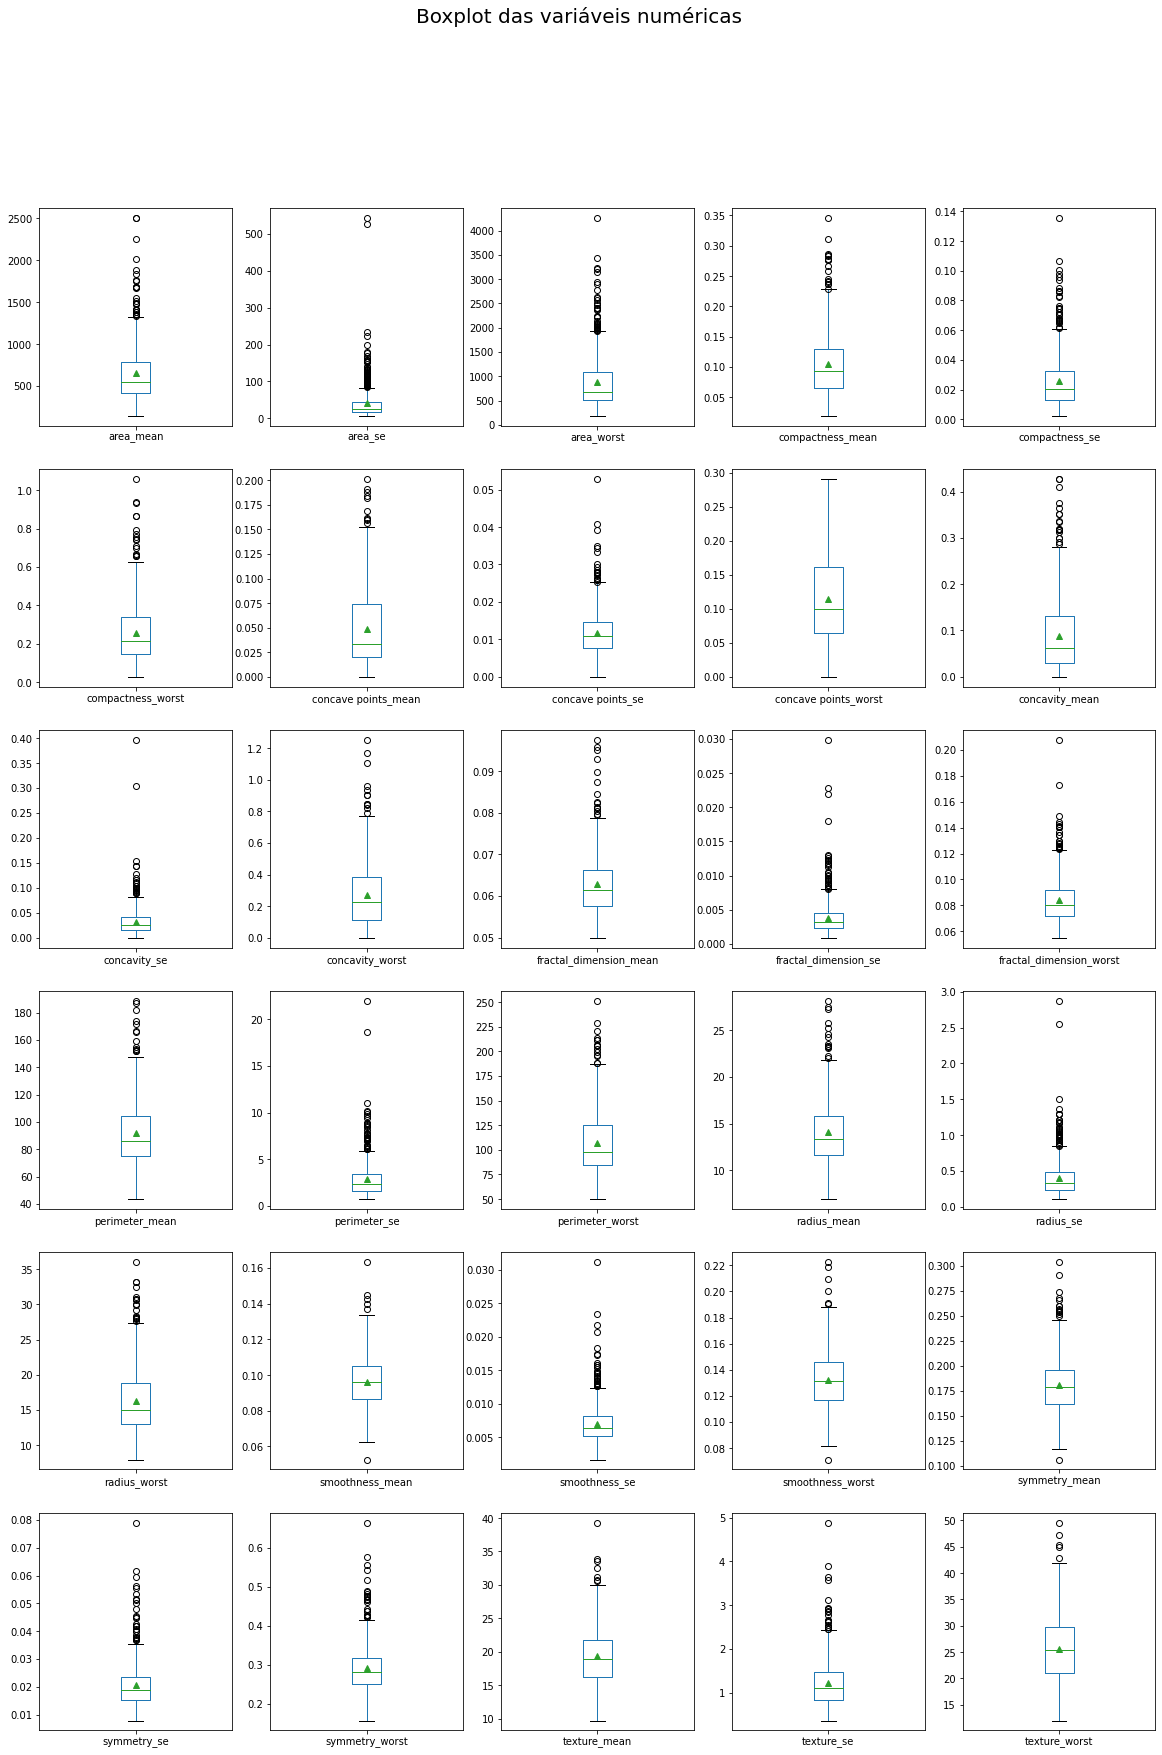

In [286]:
nv_index = len(numeric_vars) - 1 

ncols = 5
nrows = int(np.ceil(len(numeric_vars)/(1.0 * ncols)))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 28))

fig.suptitle('Boxplot das variáveis numéricas', fontsize=20)

for lines in axes: #itera nas linhas
    for cols in lines: #itera nas colunas dentro das linhas
        if nv_index >= 0:  #verifica o indice a ser usado
            
            linha = np.where(axes == lines)[0][0] #pega o index da linha
            coluna = np.where(lines == cols)[0][0] #pega o index da coluna

            df.boxplot(column=numeric_vars[nv_index], grid=False,
            vert=True, showmeans=True, ax=axes[linha, coluna])
            
            nv_index -= 1
        else:
            plt.axis('off')

plt.show()

- Existem muitos outliers detectados em todas as variáveis, nenhum deles parece ser oriundo de erro de digitação ou aferição.

## 2.4 Verificação de nulos

In [287]:
columns = tuple(df.columns)
list_na = list()

for column in columns:
  dct = {
      'Coluna': column,
      'N/A': df[column].isna().sum(),
      'Unique': tuple(df[column].unique())[:5],
      'Uniq-len': len(df[column].unique())
  }
  list_na.append(dct)

print(*sorted(list_na, key=lambda x: x['Uniq-len'], reverse=True), sep='\n')

{'Coluna': 'smoothness_se', 'N/A': 0, 'Unique': (0.006399, 0.005225, 0.00615, 0.00911, 0.01149), 'Uniq-len': 547}
{'Coluna': 'fractal_dimension_se', 'N/A': 0, 'Unique': (0.006193, 0.003532, 0.004571, 0.009208, 0.005115), 'Uniq-len': 545}
{'Coluna': 'area_worst', 'N/A': 0, 'Unique': (2019.0, 1956.0, 1709.0, 567.7, 1575.0), 'Uniq-len': 544}
{'Coluna': 'concave points_mean', 'N/A': 0, 'Unique': (0.1471, 0.07017, 0.1279, 0.1052, 0.1043), 'Uniq-len': 542}
{'Coluna': 'compactness_se', 'N/A': 0, 'Unique': (0.04904, 0.01308, 0.04006, 0.07458, 0.02461), 'Uniq-len': 541}
{'Coluna': 'radius_se', 'N/A': 0, 'Unique': (1.095, 0.5435, 0.7456, 0.4956, 0.7572), 'Uniq-len': 540}
{'Coluna': 'area_mean', 'N/A': 0, 'Unique': (1001.0, 1326.0, 1203.0, 386.1, 1297.0), 'Uniq-len': 539}
{'Coluna': 'concavity_worst', 'N/A': 0, 'Unique': (0.7119, 0.2416, 0.4504, 0.6869, 0.4), 'Uniq-len': 539}
{'Coluna': 'compactness_mean', 'N/A': 0, 'Unique': (0.2776, 0.07864, 0.1599, 0.2839, 0.1328), 'Uniq-len': 537}
{'Coluna': 

- Sem valores nulos em nenhuma variável.

## 2.5 Análise de correlação

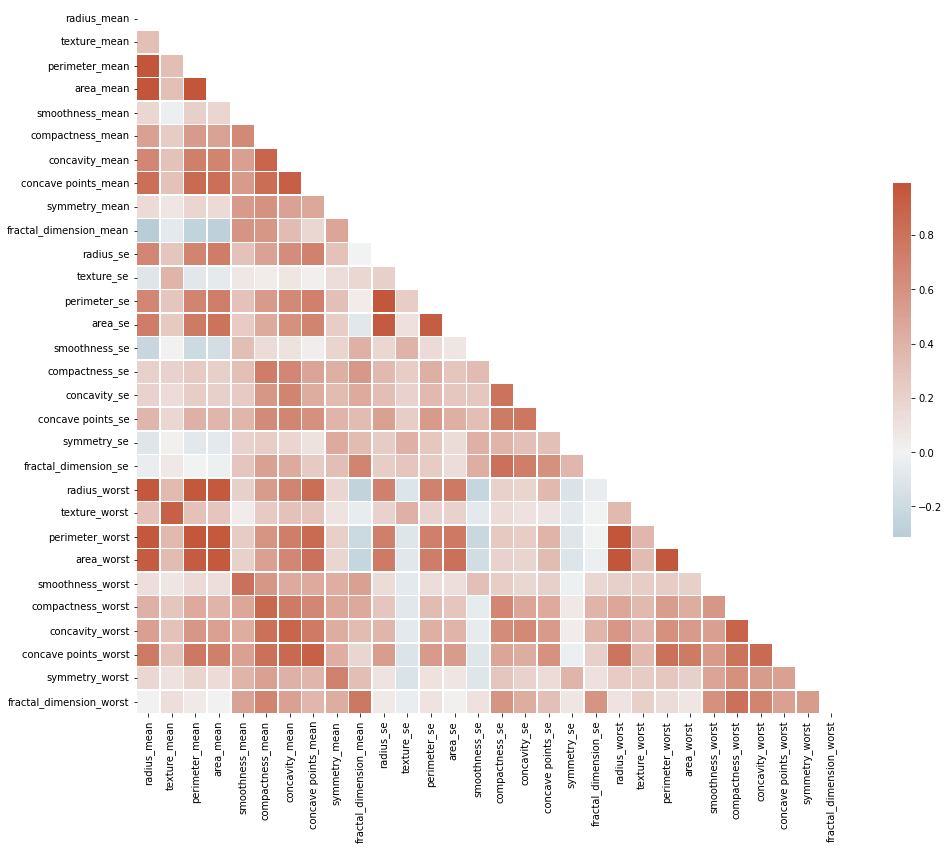

In [288]:
corr = df.select_dtypes(include='number').corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(18,13))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

- Existe alta correlação entre as variáveis de medidas (áreas, perímetros, raios) 
- Por ser um dataset com alta correlação e muitos outliers, não é interessante usar modelos de regressão pura.

## 2.6 Definição de baseline para fins de comparação

In [289]:
baseline = (pd.DataFrame(df['diagnosis'].describe()).loc['freq'] / df.shape[0])*100

print(f"baseline: {float(baseline)}% \nTOP: {pd.DataFrame(df['diagnosis'].describe()).loc['top']}")

baseline: 62.741652021089635% 
TOP: diagnosis    B
Name: top, dtype: object


- Chutando ao acaso, temos quase 63% de chance de acertarmos que o tumor é benígno.

# 3.0 Separação e processamento dos dados

In [290]:
X = df.drop(columns=['diagnosis'])
y = pd.get_dummies(df['diagnosis'], 
    drop_first=True).rename(columns={'M': 'diag_m'}) #1 para malígno, 0 para benígno

- Dados separados, y como target (0 para benígno, 1 para malígno)

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [292]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep='\n')

(455, 30)
(114, 30)
(455, 1)
(114, 1)


## 3.1 Escalonamento de variáveis

In [293]:
normalizer = Normalizer()
normalizer.fit(X_train)

Normalizer()

In [294]:
X_trainSC = normalizer.transform(X_train)
X_testSC = normalizer.transform(X_test)

# 4.0 Treinamento do modelo classificador por Multi Layer Perceptron

In [295]:
clf = MLPClassifier(hidden_layer_sizes=(100), random_state=42) #Instanciação do modelo

In [296]:
clf.fit(X_trainSC, y_train) #Treinamento do modelo

MLPClassifier(hidden_layer_sizes=100, random_state=42)

In [297]:
y_pred = pd.DataFrame(data=clf.predict(X_testSC), columns=['predicted'])
#Predição com o modelo treinado

## 4.1 Métricas de avaliação

In [298]:
acc = accuracy_score(y_test, y_pred)*100
f1 = f1_score(y_test, y_pred)*100
recall = recall_score(y_test, y_pred)*100

print(f'accuracy: {acc}%', f'f1 score: {f1}%', f'recall: {recall}%', sep='\n')

accuracy: 93.85964912280701%
f1 score: 91.13924050632912%
recall: 83.72093023255815%


Acurácia de 93%, F1 de 91% e Recall de 83%, o modelo se prova mais eficiente do que o chute ao acaso.

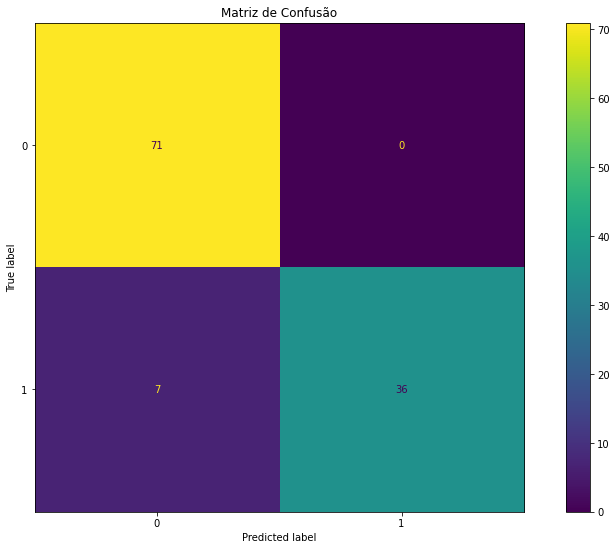

In [299]:
fig, ax = plt.subplots(figsize=(15,9))
plt.title('Matriz de Confusão')
plot_confusion_matrix(clf, X_testSC, y_test, ax=ax)
plt.show()

- Nas condições acima determinadas, o modelo errou somente 7 casos de tumor malígno.